In [1]:
import os #To import| library

In [2]:
PATH = os.getcwd() #Get current work directory


In [3]:
PATH

'C:\\Users\\MoAly\\Development\\LearningCurve\\Stage One'

In [4]:
DATAPATH = PATH + '\\Data'

SCRIPTPATH = PATH + '\\script'


try:
    os.mkdir(DATAPATH)
except FileExistsError:
    pass


In [ ]:
try:
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import psutil

except:
    %pip install pandas
    %pip install numpy
    %pip install seaborn
    %pip install matplotlib
    %pip install psutil

    import pandas as pd
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import psutil
#Later this will be replaced by requirments.txt

In [6]:
def get_process_directory(pid):
    try:
        
        process = psutil.Process(pid)
        
        executable_path = process.exe()
        return executable_path
    except psutil.NoSuchProcess:
        return 0
    except Exception as e:
        return 0

In [7]:
PROCESS_NUM_TARGETED = 1000000 #Can be tuned based on the number of targeted process that is have to be inspected


if os.path.isfile(PATH + '\\Data' + '\\process.csv'):
    data = pd.read_csv(PATH + '\\Data' + '\\process.csv')
    dataframe = data

else:
    data = {
        'ID': [id for id in range (PROCESS_NUM_TARGETED)],
        'Execution Path' : [get_process_directory(pid) for pid in range(PROCESS_NUM_TARGETED)]    
    }
    dataframe = pd.DataFrame(data)




In [8]:
dataframe.head() #Show the first 5 rows

,ID,Execution Path
0,0,0
1,1,0
2,2,0
3,3,0
4,4,


In [9]:
set(dataframe['Execution Path']) #To check if there is pathes that is been extracted.

{'',
 0,
 'C:\\Program Files (x86)\\Adobe\\Adobe Sync\\CoreSync\\CoreSync.exe',
 'C:\\Program Files (x86)\\Common Files\\Adobe\\ARM\\1.0\\armsvc.exe',
 'C:\\Program Files (x86)\\Common Files\\Adobe\\Adobe Desktop Common\\ADS\\Adobe Crash Processor.exe',
 'C:\\Program Files (x86)\\Common Files\\Adobe\\Adobe Desktop Common\\ADS\\Adobe Desktop Service.exe',
 'C:\\Program Files (x86)\\Common Files\\Adobe\\Adobe Desktop Common\\ElevationManager\\AdobeUpdateService.exe',
 'C:\\Program Files (x86)\\Common Files\\Adobe\\Adobe Desktop Common\\IPCBox\\AdobeIPCBroker.exe',
 'C:\\Program Files (x86)\\Dell\\UpdateService\\DCF\\Dell.DCF.UA.Bradbury.API.SubAgent.exe',
 'C:\\Program Files (x86)\\Dell\\UpdateService\\ServiceShell.exe',
 'C:\\Program Files (x86)\\Microsoft\\EdgeWebView\\Application\\120.0.2210.144\\msedgewebview2.exe',
 'C:\\Program Files (x86)\\Microsoft\\Edge\\Application\\msedge.exe',
 'C:\\Program Files (x86)\\NVIDIA Corporation\\NvNode\\NVIDIA Web Helper.exe',
 'C:\\Program Files\\

In [10]:
# The function bellow labiling any execution path by 1 if there is 'program file' in the path

def labeling_Program_Files_process(data):
    pathes = list(data['Execution Path'])
    labels = []

    for path in pathes:
        if path is int:
            labels.append(0)
        elif 'program files' in str(path).lower():
            labels.append(1)
        else:
            labels.append(0)



    
    return labels



In [11]:
program_file_process = labeling_Program_Files_process(data)

In [12]:
set(program_file_process)


{0, 1}

In [13]:
dataframe['Program File Process'] = program_file_process

In [14]:
dataframe.head()

,ID,Execution Path,Program File Process
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,,0


In [15]:
set(dataframe['Program File Process'])

{0, 1}

In [16]:
#The funtion below is going to filter the unwanted execution pathes
"""
The main goal is to find the real number of process that is been executed currently

"""

def data_cleaning(data = dataframe):

    data = data[data['Execution Path'] != 0]

    data = data[data['Execution Path'] != '0']
    data = data[data['Execution Path'] != '']

    data = data.dropna()


    return data

In [17]:
cleaned_data = data_cleaning(dataframe)

In [18]:
cleaned_data


,ID,Execution Path,Program File Process
208,208,Registry,0
764,764,C:\Windows\System32\smss.exe,0
788,788,C:\Windows\System32\csrss.exe,0
820,820,C:\Windows\System32\svchost.exe,0
844,844,C:\Program Files\WindowsApps\microsoftwindows....,1
...,...,...,...
30920,30920,C:\Program Files (x86)\Microsoft\EdgeWebView\A...,1
30921,30921,C:\Program Files (x86)\Microsoft\EdgeWebView\A...,1
30922,30922,C:\Program Files (x86)\Microsoft\EdgeWebView\A...,1
30923,30923,C:\Program Files (x86)\Microsoft\EdgeWebView\A...,1


In [19]:
cleaned_data.to_csv(DATAPATH + '//process.csv') #Going to save the dataset

In [20]:
np.array(cleaned_data['Program File Process']).sum() #Total of program file Process that is been run

429

In [21]:
encoded_data = cleaned_data

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
enc = LabelEncoder() #we are going to use label encoder to gives each path a numerical value

In [24]:
pathes = pd.DataFrame(cleaned_data['Execution Path']) 

In [25]:
encoded_data['Execution Path'] = enc.fit_transform(pathes)

"""
WE ARE ONLY USING .fit_transform IF THERE IS NEW PATHES
"""

C:\Users\MoAly\Anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
encoded_data.head()

,ID,Execution Path,Program File Process
208,208,135,0
764,764,118,0
788,788,100,0
820,820,120,0
844,844,58,1


In [27]:
cleaned_data.head()

,ID,Execution Path,Program File Process
208,208,135,0
764,764,118,0
788,788,100,0
820,820,120,0
844,844,58,1


In [28]:
enc.inverse_transform([57]) 

array(['C:\\Program Files\\WindowsApps\\microsoftwindows.client.webexperience_424.400.20.0_x64__cw5n1h2txyewy\\Dashboard\\WidgetService.exe'],
      dtype=object)

In [29]:
import matplotlib.pyplot as plt


In [30]:
x_axis = ['Not Program File Process', 'Program File Process']
x_axis

['Not Program File Process', 'Program File Process']

In [31]:
num_of_pf_process = np.array(cleaned_data['Program File Process']).sum()
total_num_of_proces = len(cleaned_data['Program File Process'])
y_axis = [(total_num_of_proces - num_of_pf_process), num_of_pf_process]

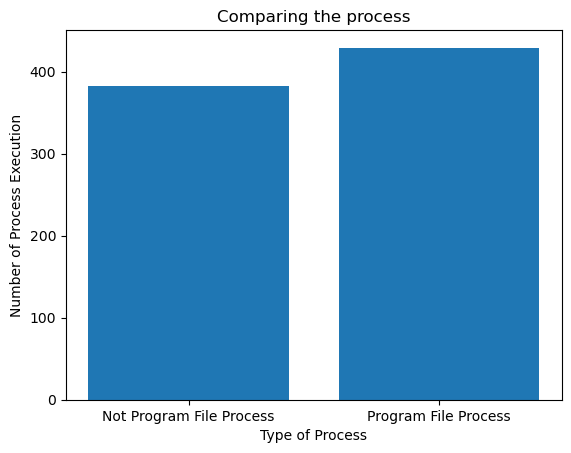

In [32]:
plt.bar(x_axis,y_axis)
plt.xlabel("Type of Process")
plt.ylabel('Number of Process Execution')
plt.title("Comparing the process")
plt.show()

In [33]:
cleaned_data.head()

,ID,Execution Path,Program File Process
208,208,135,0
764,764,118,0
788,788,100,0
820,820,120,0
844,844,58,1


In [34]:
set(encoded_data['Program File Process'])

{0, 1}

In [35]:
X = encoded_data['Execution Path']
y = encoded_data['Program File Process']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression




In [68]:
clf = LogisticRegression()

In [69]:
X_train_reshaped = X_train.values.reshape(-1,1)
y_train_reshaped = y_train.values.reshape(-1,1)

In [70]:
clf.fit(X_train_reshaped,y_train_reshaped)

C:\Users\MoAly\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [71]:
y_pred = clf.predict(X_test.values.reshape(-1,1))

In [72]:
accuracy_score(y_pred,y_test.values.reshape(-1,1))

1.0

In [73]:
precision_score(y_pred,y_test.values.reshape(-1,1))

1.0

In [74]:
recall_score(y_pred,y_test.values.reshape(-1,1))

1.0